In [2]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown

In [3]:
base_path = os.path.join('/home/unix/jiahao/wanglab/Data/Analyzed/2024-09-05-Mingrui-PFC-rep1')
log_path = os.path.join(base_path, 'log')
signal_path = os.path.join(base_path, 'signal')
output_path = os.path.join(base_path, 'output')

In [4]:
gr_shifts_df = pd.read_csv(os.path.join(log_path, 'gr_shifts.csv'))
gr_shifts_df = gr_shifts_df.sort_values(by=['fov_id', 'round'])
gr_shifts_df.index = gr_shifts_df['fov_id'] + '_' + gr_shifts_df['round']
gr_shifts_df = gr_shifts_df.loc[:, ['row', 'col', 'z']]
gr_shifts_df

,row,col,z
Position001_round2,-8,-10,3
Position001_round3,-11,-12,0
Position001_round4,-13,-2,1
Position001_round5,-10,-5,3
Position001_round6,-13,-12,4
...,...,...,...
Position787_round4,1,0,0
Position787_round5,-1,-3,0
Position787_round6,1,-2,0
Position787_round7,5,1,0


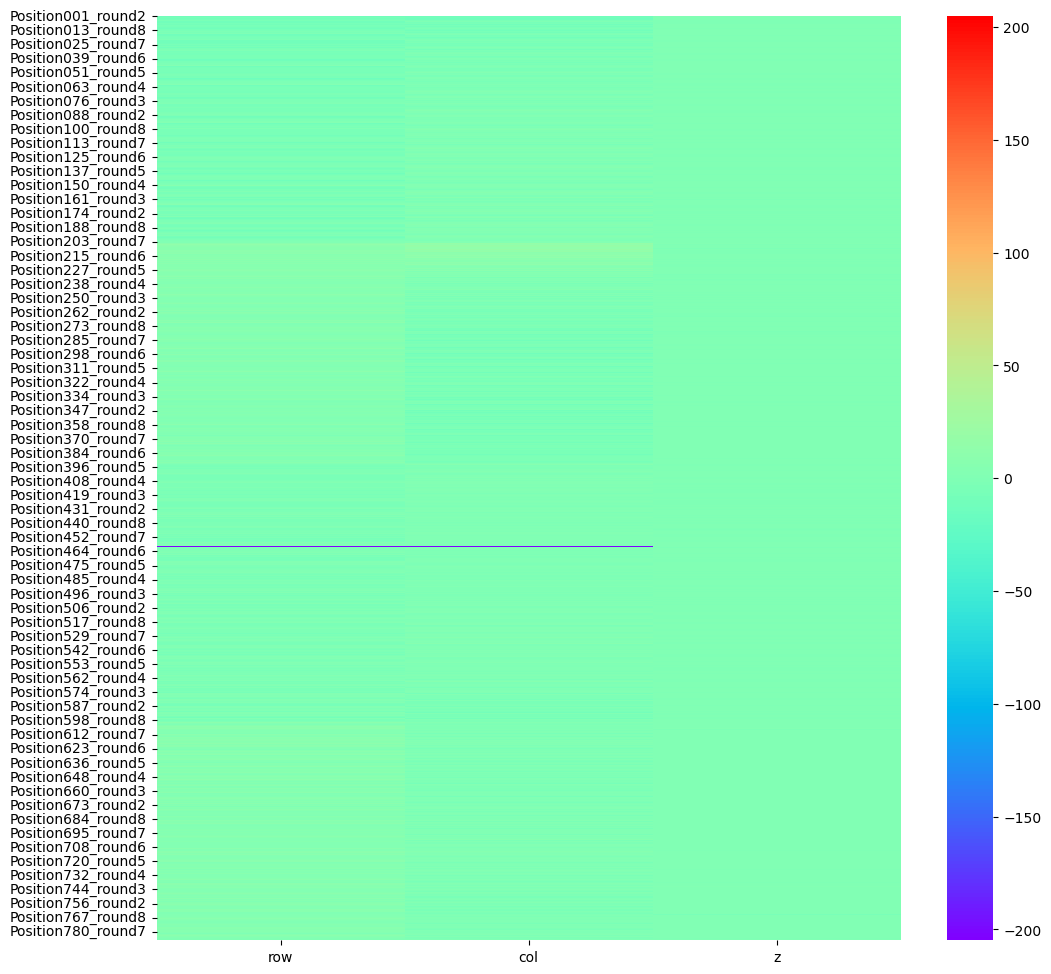

In [31]:
threshold = 0.1 * 2048
plt.figure(figsize=(12, 12))
sns.heatmap(gr_shifts_df, cmap='rainbow', annot=False, fmt="d", vmin=-threshold, vmax=threshold)
plt.show()

In [13]:
gr_shifts_df.max()

row    16
col    20
z       4
dtype: int64

In [20]:
gr_shifts_df.loc[~gr_shifts_df['row'].isin(range(-200, 200))]

,row,col,z
Position460_round5,-935,-793,0


In [33]:
sns.swarmplot(data=gr_shifts_df['z'])

KeyboardInterrupt: 

In [8]:
sf_scores = pd.read_csv(os.path.join(log_path, 'sf_scores.csv'))
sf_scores = sf_scores.sort_values(by=['fov_id', 'subtile_id'])
sf_scores

,fov_id,subtile_id,total_spots,no_color,multi_color,spots_in_codebook,correctform_1,correctform_2,good_spots
1910,Position001,1,70025,0,13353,0.409532,0.647163,0.568270,23209
1912,Position001,2,54859,0,10374,0.445791,0.679847,0.594920,19831
1922,Position001,3,41816,0,8483,0.462305,0.683557,0.607986,15410
2418,Position001,4,34984,0,7216,0.484334,0.709162,0.620678,13449
2402,Position002,1,43903,0,8223,0.482371,0.695067,0.627607,17211
...,...,...,...,...,...,...,...,...,...
1553,Position786,4,53691,0,7393,0.244265,0.482980,0.455160,11309
2598,Position787,1,52603,0,6637,0.231802,0.482835,0.425880,10655
2870,Position787,2,179,0,170,0.777778,0.888889,0.888889,7
3006,Position787,3,199,0,166,0.515151,0.787879,0.606061,17


In [13]:
sample_annotation = pd.read_csv(f"{base_path}/documents/sample-annotation.csv")
sample_dict = {}
for current_sample in sample_annotation['sample_id'].unique():
    # fov_list = []

    current_start = sample_annotation.loc[sample_annotation['sample_id'] == current_sample, 'fov_start'].values[0]
    current_end = sample_annotation.loc[sample_annotation['sample_id'] == current_sample, 'fov_end'].values[0]

    for i in range(current_start, current_end+1):
        # current_fov = config['fov_id_pattern'].format(i=i)
        current_fov = f"Position{i:03}".format(i=i)
        # fov_list.append(current_fov)
        sample_dict[current_fov] = current_sample
    # sample_dict[current_sample] = fov_list

In [15]:
sf_scores['sample'] = sf_scores['fov_id'].map(sample_dict)
sf_scores

,fov_id,subtile_id,total_spots,no_color,multi_color,spots_in_codebook,correctform_1,correctform_2,good_spots,sample
1910,Position001,1,70025,0,13353,0.409532,0.647163,0.568270,23209,sample1
1912,Position001,2,54859,0,10374,0.445791,0.679847,0.594920,19831,sample1
1922,Position001,3,41816,0,8483,0.462305,0.683557,0.607986,15410,sample1
2418,Position001,4,34984,0,7216,0.484334,0.709162,0.620678,13449,sample1
2402,Position002,1,43903,0,8223,0.482371,0.695067,0.627607,17211,sample1
...,...,...,...,...,...,...,...,...,...,...
1553,Position786,4,53691,0,7393,0.244265,0.482980,0.455160,11309,sample4
2598,Position787,1,52603,0,6637,0.231802,0.482835,0.425880,10655,sample4
2870,Position787,2,179,0,170,0.777778,0.888889,0.888889,7,sample4
3006,Position787,3,199,0,166,0.515151,0.787879,0.606061,17,sample4


In [ ]:
ssssss

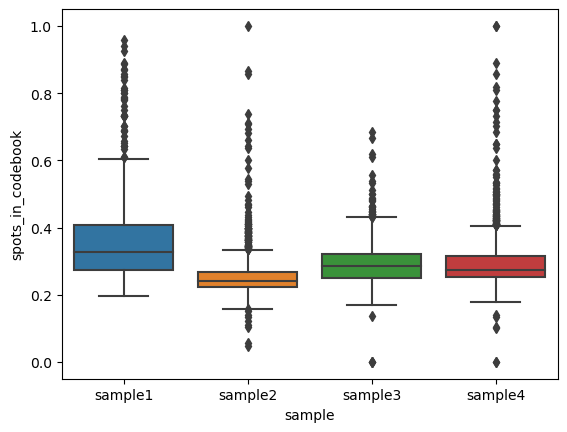

In [19]:
sns.boxplot(data=sf_scores, x='sample', y='spots_in_codebook')
plt.show()

<AxesSubplot: xlabel='sample', ylabel='total_spots'>

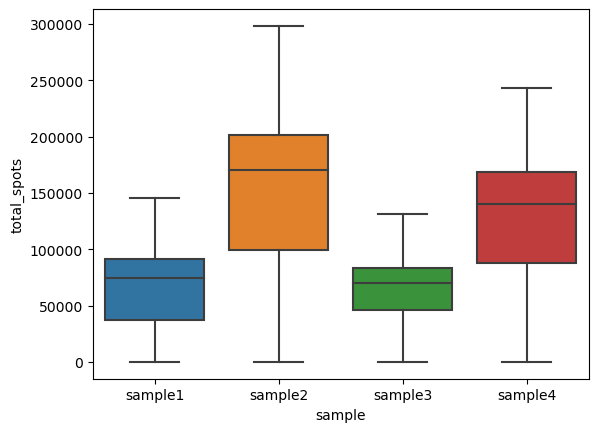

In [17]:
sns.boxplot(data=sf_scores, x='sample', y='total_spots')

<AxesSubplot: xlabel='sample', ylabel='good_spots'>

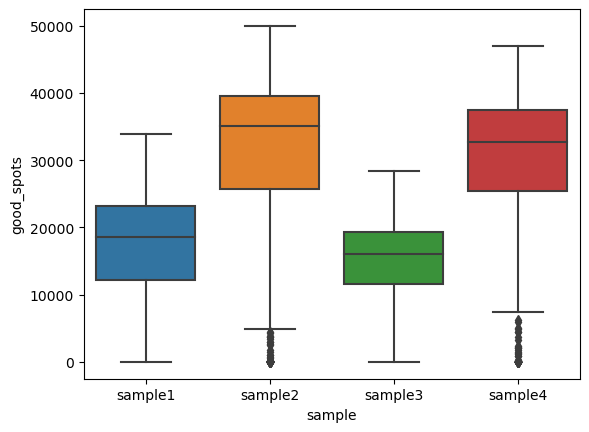

In [18]:
sns.boxplot(data=sf_scores, x='sample', y='good_spots')